<a href="https://colab.research.google.com/github/SyedHuzaifa007/PIAIC-Deep-Learning-Assignments/blob/main/Credit_Card_Fraud_Detection_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
import tensorboard
from pylab import rcParams

In [67]:
# Loading The Data
df = pd.read_csv("/content/drive/MyDrive/ML_Datasets/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
# # Configuring Modules
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale = 1.5)
rcParams['figure.figsize'] = 14, 8
Random_Seed = 42

In [4]:
# Renaming Columns
df.rename(columns = {"Class": "Fraud"}, inplace = True)

In [5]:
 df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape

(284807, 31)

In [7]:
# Checking Data For Null Values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Fraud     0
dtype: int64

OUR DATA CONTAINS NO NULL VALUES

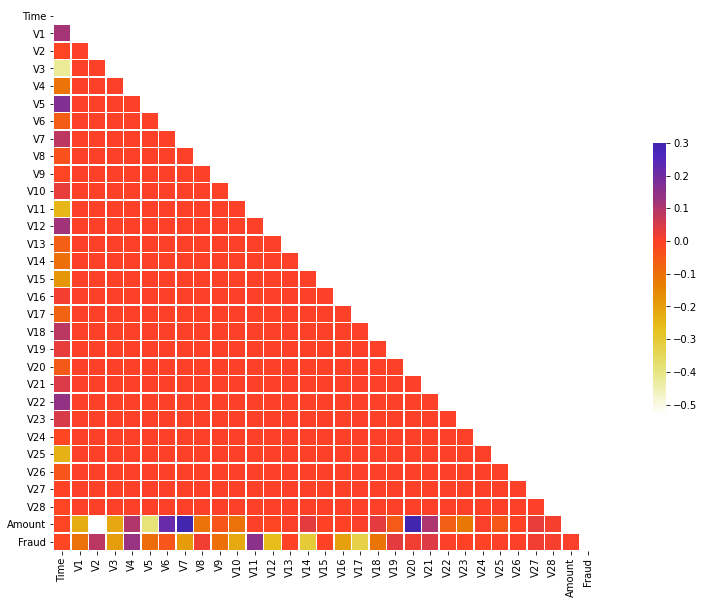

In [8]:
# Checking Correlations
corr = df.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# figure size
f, ax = plt.subplots(figsize=(20, 10))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='CMRmap_r', vmax=.3, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5})

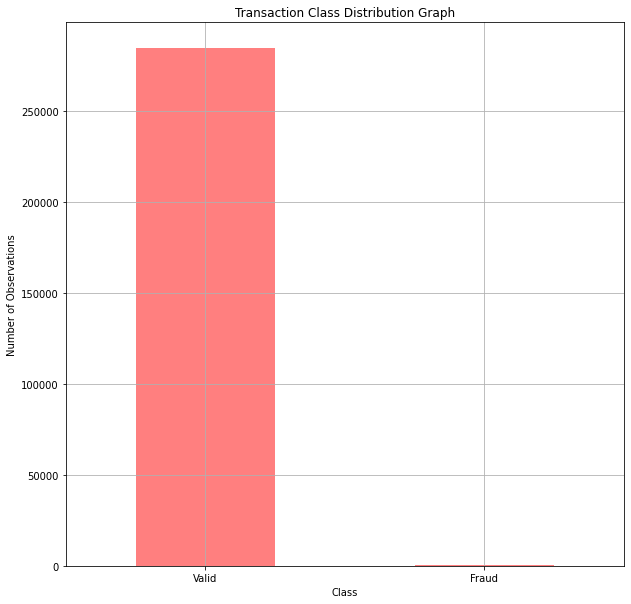

In [9]:
labels = ['Valid', 'Fraud']
plt.figure(figsize = (10,10))
count_classes = pd.value_counts(df['Fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color = 'red', alpha = 0.5)
plt.xticks(range(2), labels)
plt.title("Transaction Class Distribution Graph")
plt.xlabel("Class")
plt.ylabel("Number of Observations")
plt.grid()
plt.show()

In [11]:
len(df)

284807

There are total 284807 number of transactions

In [12]:
len_fraud = len(df[df.Fraud ==  1])
len_fraud

492

Out of 284807 transactions 492 are the fraud transactions

In [13]:
len_valid = 284807 - 492
len_valid

284315

Out of 284807 transactions 284315 are the valid transactions

In [14]:
perc_fraud = (len_fraud * 100) / len(df)
perc_fraud

0.1727485630620034

### As you can see out of total transactions only **0.17 %** are the fraud transactions. It means that we have highly **Imbalance Dataset** in our hands. There is a **large margin** between the valid transactions and the fraud transactions.

In [15]:
# Making DataFrames Of Valid And Fraud Transactions To Check Important Stats
Fraud_df = df[df.Fraud == 1]
Valid_df = df[df.Fraud == 0]

In [16]:
# Checking Important Stats of Amount used in Fraud Transactions
Fraud_df.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
# Checking Imprtant Stats of Amount used in Valid Transactions
Valid_df.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

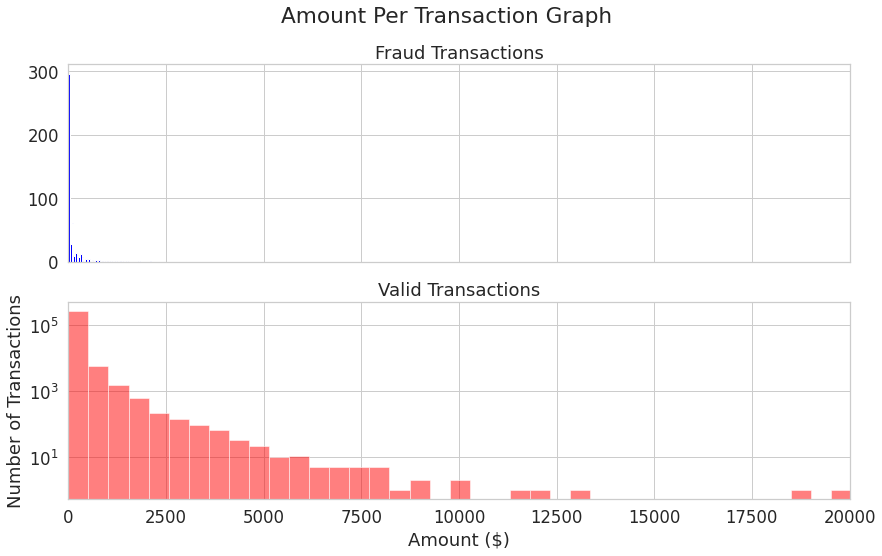

In [18]:
# Amount per transaction by class
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount Per Transaction Graph')

bins = 50

ax1.hist(Fraud_df.Amount, bins = bins, color='blue')
ax1.set_title('Fraud Transactions')

ax2.hist(Valid_df.Amount, bins = bins, color='red', alpha = 0.5)
ax2.set_title('Valid Transactions')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

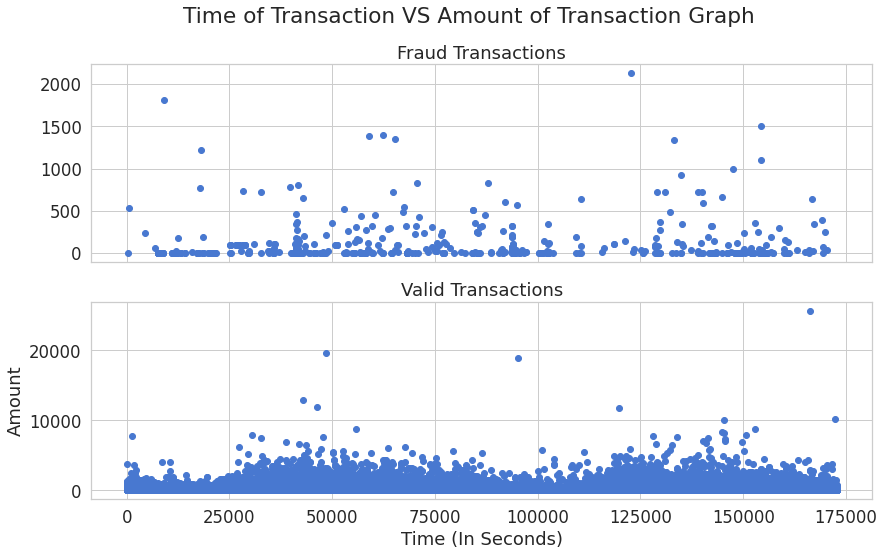

In [19]:
# Time of transaction vs Amount by class
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of Transaction VS Amount of Transaction Graph')

ax1.scatter(Fraud_df.Time, Fraud_df.Amount)
ax1.set_title('Fraud Transactions')

ax2.scatter(Valid_df.Time,Valid_df.Amount)
ax2.set_title('Valid Transactions')

plt.xlabel('Time (In Seconds)')
plt.ylabel('Amount')
plt.show()

In [20]:
# Normalizing Data
# We Need To Normalize Two Features: Time And Amount
from sklearn.preprocessing import StandardScaler
df_norm = df
df_norm['Time'] = StandardScaler().fit_transform(df_norm['Time'].values.reshape(-1, 1))
df_norm['Amount'] = StandardScaler().fit_transform(df_norm['Amount'].values.reshape(-1, 1))

Splitting Dataset Into Testing and Training Data

In [21]:
# Training Data
train_data = df_norm.iloc[:199365,:]
train_data.shape

(199365, 31)

In [22]:
# Testing Data
test_data = df_norm.iloc[199365:,:]
test_data.shape

(85442, 31)

In [23]:
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [24]:
test_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
199365,0.802626,2.152590,-0.900447,-1.092456,-0.994969,-0.613447,-0.760012,-0.530218,-0.222248,-0.214416,0.746967,-1.256213,-0.762171,0.086847,-0.133543,0.365813,1.400839,-0.115840,-1.594770,1.026636,0.060715,-0.281725,-0.987236,0.358646,-0.782338,-0.480245,-0.647930,-0.023563,-0.044354,-0.129536,0
199366,0.802626,1.811278,0.224393,0.542888,3.606222,-0.162910,1.171241,-0.874598,0.419449,-0.546470,1.493825,0.583293,0.884700,0.831223,-0.293394,-0.870717,1.653737,-1.335181,0.431294,-1.605950,-0.198616,0.109290,0.345703,0.365984,0.663253,-0.531272,-0.225013,0.032563,-0.022693,-0.350071,0
199367,0.802626,-1.524832,-0.544095,-0.288824,-0.916791,3.524219,-1.830070,1.375925,-0.814647,-0.648070,-0.072189,1.020453,0.808519,0.179530,0.403686,-1.355320,-0.890292,-0.823874,-0.161798,-0.240885,-0.209666,0.272832,1.245119,-0.867245,0.838885,0.860487,-0.081074,-0.252743,-0.377957,-0.229689,0
199368,0.802647,0.099135,0.873164,-0.362487,-0.612234,0.747229,-0.629384,0.755890,0.126794,-0.051667,-0.613531,0.826612,-0.315592,-1.848798,-0.465431,-0.757847,0.571839,0.262660,0.450587,0.023705,-0.090654,-0.302759,-0.840999,0.115856,0.613080,-0.528392,0.092546,0.207960,0.071553,-0.346113,0
199369,0.802647,2.005556,-0.146704,-1.019430,0.330239,-0.180449,-0.953319,0.053860,-0.165823,0.352282,0.255342,0.953976,0.886864,-0.546470,0.579937,-0.610841,0.088436,-0.475671,-0.341351,0.402815,-0.241755,-0.235137,-0.613122,0.342269,0.063677,-0.359509,0.174021,-0.078440,-0.069642,-0.331760,0


In [25]:
# Shuffling Training And Testing Data
train_data = train_data.sample(frac=1)
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
46846,-1.092082,-1.650726,1.173264,0.508510,0.740817,0.470490,1.565926,-1.192915,-1.867012,-0.747677,-0.905433,-0.281543,1.042355,0.183807,0.660813,-0.496259,-0.079472,0.002716,0.241684,1.191710,0.370294,-1.415126,0.185438,0.314975,-1.331399,-0.078826,-0.404131,-0.016491,0.025170,-0.306412,0
146237,-0.152793,-0.216313,0.645824,1.329953,1.135945,-0.651658,0.040221,-0.084567,-0.127728,0.262307,0.369306,-0.851833,0.011632,0.643984,-0.341033,1.535075,-0.862120,0.442922,0.487403,2.428530,0.185473,0.380905,1.313196,-0.123685,0.161884,-0.961154,0.952837,-0.171112,0.261904,-0.233327,0
95772,-0.618131,-0.931731,0.796669,1.624909,0.959804,1.000096,2.067261,0.494277,0.326703,-0.415601,0.206530,1.954914,1.057267,-0.215559,-0.006318,0.447675,-2.105022,1.195485,-1.739915,-0.095511,-0.099802,0.114731,0.727518,-0.189663,-0.984309,-0.206616,-0.175624,-0.358955,-0.111320,-0.254397,0
195413,0.762784,2.062967,0.603269,-3.170286,0.618982,1.222367,-1.368905,0.678477,-0.304216,-0.136744,-0.857420,1.660751,0.024277,-0.986229,-2.086288,-0.630069,0.543270,1.980518,1.113774,-0.024549,-0.160002,-0.023113,0.071242,-0.041643,0.576205,0.343119,0.661012,-0.089744,-0.024011,-0.350191,0
64350,-0.920165,1.324395,-0.595548,0.548615,0.023858,-1.005098,-0.040412,-0.746598,0.111001,-0.525578,0.787072,0.252943,0.320921,-0.625301,-0.018457,-1.116769,-1.510770,0.012446,1.479007,-0.152657,-0.572049,-0.454030,-0.656174,-0.024336,0.006270,0.427758,0.418687,0.003698,0.000711,-0.349231,0


In [26]:
test_data = test_data.sample(frac = 1)
test_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
279173,1.555615,2.061369,0.045790,-1.761601,0.264950,0.569283,-0.764322,0.484737,-0.315270,0.235729,0.076834,0.630349,1.453843,0.587328,0.501449,-1.027628,-0.594718,-0.470130,-0.202454,0.596850,-0.210085,0.034840,0.369721,-0.028614,-0.416919,0.398602,-0.212642,-0.031261,-0.080229,-0.349231,0
269822,1.452494,-0.233558,1.311785,-0.774842,-0.514552,0.733885,-0.752661,0.714606,0.272744,-0.402667,-1.111522,-0.610371,0.697593,1.290437,-0.937384,-0.360378,0.350113,0.508834,-0.399770,-0.304388,0.015576,-0.272456,-0.731518,0.167808,0.530615,-0.361323,0.117150,0.104205,0.020820,-0.289020,0
210887,0.912885,1.901158,0.012325,-1.832151,0.369465,0.767870,0.033775,0.025756,0.061994,0.603337,-0.615526,0.287901,0.245088,-0.194971,-0.610283,1.735377,-0.718975,1.284218,-0.915317,-1.572731,-0.294645,0.285837,1.083539,0.059779,-1.100482,0.016975,-0.004016,0.048042,-0.041247,-0.296776,0
278776,1.550119,-0.469669,-0.809982,-0.524369,0.389065,2.115788,-1.480763,-0.420444,0.147660,-0.147314,-0.356163,1.025580,0.294410,-0.784247,-0.496858,-0.369749,0.197797,0.523012,0.483099,0.842804,0.298441,-0.092398,-0.695913,0.524629,0.643250,-0.917730,0.145030,-0.045893,0.046066,-0.345313,0
282135,1.597604,-2.500715,0.377341,0.728890,-0.741895,-0.936535,-0.379833,0.229319,1.017676,0.044076,-1.135476,0.329547,0.733330,-1.024486,0.755377,-0.897973,0.324421,-0.096904,0.122345,0.509794,0.070750,-0.332425,-1.183012,0.012037,0.024447,0.412708,-0.292326,0.217215,-0.149903,0.210421,0


In [27]:
# Droping Labels From Training And Testing Data
train_labels = train_data.pop('Fraud')
# train_labels = train_labels.values
test_labels = test_data.pop('Fraud')
# test_labels = test_labels.values

In [28]:
train_labels 

46846     0
146237    0
95772     0
195413    0
64350     0
         ..
100049    0
58218     0
140402    0
61512     0
162824    0
Name: Fraud, Length: 199365, dtype: int64

In [30]:
test_labels

279173    0
269822    0
210887    0
278776    0
282135    0
         ..
256612    0
237842    0
252938    0
265341    0
273047    0
Name: Fraud, Length: 85442, dtype: int64

In [31]:
# Building Base Model
model = Sequential()
model.add(Dense(10, activation = 'relu', input_shape = [len(train_data.keys())]))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


In [32]:
from keras.callbacks import ModelCheckpoint, TensorBoard
checkpointer = ModelCheckpoint(filepath = 'CreditCardFraudDetectionModel.h5', verbose = 0, save_best_only = True)
tensorboard = TensorBoard(log_dir = './logs', histogram_freq = 0, write_graph = True, write_images = True)

In [33]:
history = model.fit(train_data, train_labels, epochs = 100, batch_size = 32, shuffle=True, validation_split=0.2, verbose = 1, callbacks=[checkpointer, tensorboard]).history

Epoch 1/100
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0847 - accuracy: 0.9757 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 2/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 3/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0036 - val_accuracy: 0.9992
Epoch 4/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 5/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9992
Epoch 6/100
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9992
Epoch 7/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0038 - val_ac

In [35]:
# Storing History In A Data Frame
history_df = pd.DataFrame(history)
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
95,0.001344,0.999605,0.007485,0.999147
96,0.001284,0.999542,0.007804,0.999147
97,0.001136,0.999624,0.008902,0.999072
98,0.001310,0.999574,0.008083,0.999122
99,0.001125,0.999611,0.008041,0.999097


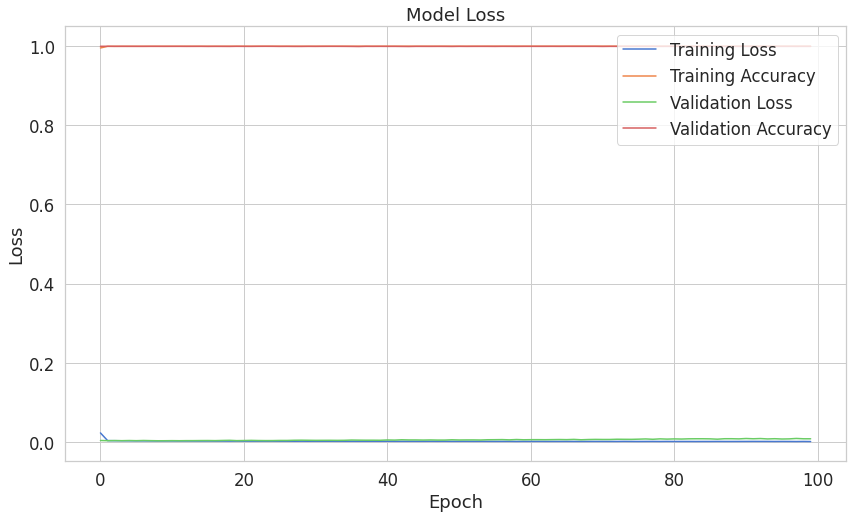

In [36]:
# Plotting Loss and Accuracy
plt.plot(history_df['loss'])
plt.plot(history_df['accuracy'])
plt.plot(history_df['val_loss'])
plt.plot(history_df['val_accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Training Accuracy', 'Validation Loss', 'Validation Accuracy'], loc='upper right');

In [37]:
# Making Predictions On Test Data
predictions = model.predict(test_data)
predictions = predictions.flatten()

In [38]:
predictions

array([5.5610534e-12, 1.5843403e-07, 1.5995865e-16, ..., 1.4072149e-10,
       9.3378258e-06, 2.1056392e-12], dtype=float32)

In [39]:
testing = model.evaluate(test_data, test_labels)

2671/2671 [==============================] - 3s 942us/step - loss: 0.0072 - accuracy: 0.9994


In [40]:
print(f"Test Loss: {testing[0]}")
print(f"Test Accuracy: {testing[1]}")

Test Loss: 0.007237727288156748
Test Accuracy: 0.9994382262229919


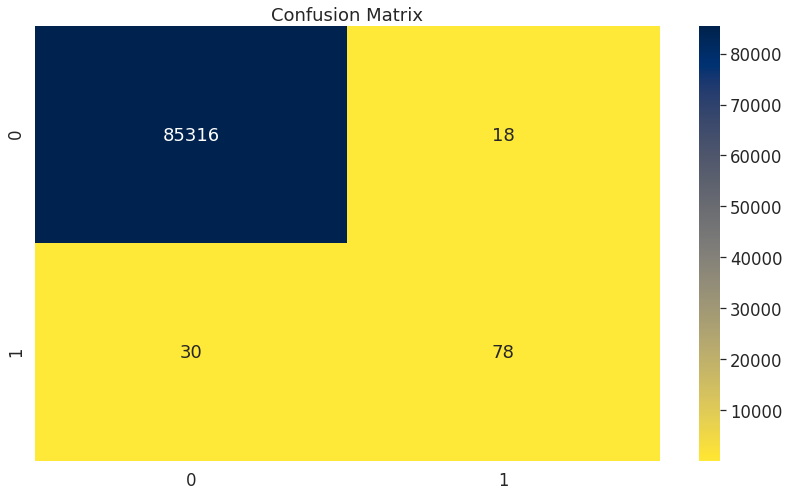

In [53]:
from sklearn.metrics import confusion_matrix, classification_report
# y_pred = model.predict(X_test)
y_test = pd.DataFrame(testing)
cm = confusion_matrix(test_labels, predictions.round())
sns.heatmap(cm, annot=True, fmt='.0f', cmap='cividis_r')
plt.title("Confusion Matrix")
plt.show()

## Unbalanced Data
### As we can see that our model is overfitted because it is most probably unable to discriminate between valid transactions and fraud transactions because the mass of fraud transactions is very low as compared to the valid transactions and our model can treat them as normal transactions. Lets overcome this problem.


# Building Second Model For Overcoming Unbalanced Data Problem

There are many techniques to solve this problem but here I am using SMOTE Algorithm.

In [106]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [107]:
df['NormAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time','Amount'],axis=1)

X = df.iloc[:, df.columns != 'Class']
y = df.iloc[:, df.columns == 'Class']

In [111]:
from imblearn.over_sampling import SMOTE
np.random.seed(9)

In [118]:
# Count fraudulent and non-fraudulent transactions
all_records= len(df)
number_records_fraud = len(df[df.Class == 1])
print(all_records,number_records_fraud)

# Apply SMOTE
X_resample, y_resample = SMOTE().fit_sample(X, y.values.ravel())

284807 492


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [119]:
# Transform into a panda dataframe
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)
# Split into training and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X_resample, y_resample, test_size=0.3, random_state=0)

In [120]:
from keras.layers import Dropout


model = Sequential([
    Dense(units=16, kernel_initializer='uniform', input_dim=29, activation='relu'),
    Dense(units=18, kernel_initializer='uniform', activation='relu'),
    Dropout(0.25),
    Dense(20, kernel_initializer='uniform', activation='relu'),
    Dense(24, kernel_initializer='uniform', activation='relu'),
    Dense(1, kernel_initializer='uniform', activation='sigmoid')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                480       
_________________________________________________________________
dense_22 (Dense)             (None, 18)                306       
_________________________________________________________________
dropout_7 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 20)                380       
_________________________________________________________________
dense_24 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 25        
Total params: 1,695
Trainable params: 1,695
Non-trainable params: 0
____________________________________________________

In [121]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(np.array(X_train), np.array(Y_train), batch_size=15, epochs=5)

Epoch 1/5
26537/26537 [==============================] - 39s 1ms/step - loss: 0.0747 - accuracy: 0.9689
Epoch 2/5
26537/26537 [==============================] - 39s 1ms/step - loss: 0.0211 - accuracy: 0.9937
Epoch 3/5
26537/26537 [==============================] - 38s 1ms/step - loss: 0.0141 - accuracy: 0.9959
Epoch 4/5
26537/26537 [==============================] - 38s 1ms/step - loss: 0.0118 - accuracy: 0.9968
Epoch 5/5
26537/26537 [==============================] - 39s 1ms/step - loss: 0.0102 - accuracy: 0.9974


In [122]:
score = model.evaluate(np.array(X_test), np.array(Y_test), batch_size=128)
print('\nScore is ', score[1] * 100, '%')

1333/1333 [==============================] - 1s 992us/step - loss: 0.0092 - accuracy: 0.9971

Score is  99.71451759338379 %


In [124]:
# Function for plotting the confusion matrix

import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [125]:
y_pred = model.predict(np.array(X_test))

In [126]:
Y_test = pd.DataFrame(Y_test)
Y_test.shape

(170589, 1)

Recall metric in the testing dataset:  0.9976000093658172


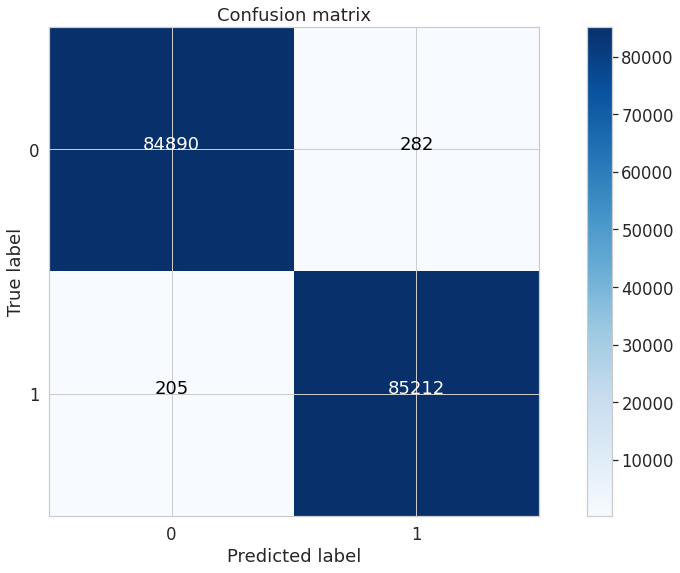

In [127]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,y_pred.round())
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [128]:
y_pred = model.predict(np.array(X))

Recall metric in the testing dataset:  0.9939024390243902


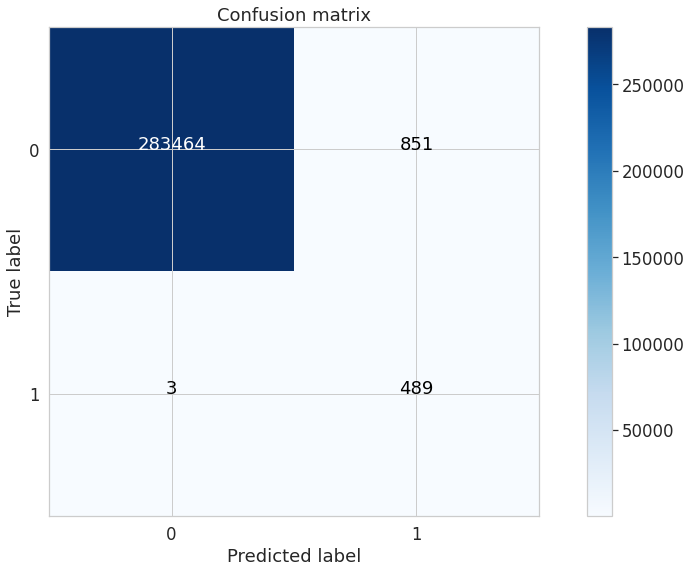

In [129]:
# Compute confusion matrix

cnf_matrix = confusion_matrix(y,y_pred.round())
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()